**GRISHMA S PATEL**

**Lets Grow More - Virtual Internship Program**

**ADVANCED LEVEL TASK -Next Word Prediction**

**July - 2022**

In [2]:
#importing required libraries
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
import warnings as wg
wg.filterwarnings("ignore") 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [3]:
#Loading the data
text = open('/content/drive/MyDrive/1661-0.txt', encoding="utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [5]:
#Data Preprocessing
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [6]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [7]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

'e'

In [8]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [9]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [10]:
X.shape

(193950, 40, 73)

In [12]:
y.shape

(193950, 73)

In [13]:
# Creating the model
model = Sequential()
model.add(LSTM(500, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500)               1148000   
                                                                 
 dense (Dense)               (None, 73)                36573     
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 1,184,573
Trainable params: 1,184,573
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=10, 
                    shuffle=True).history

Epoch 1/10
1501/1501 [==============================] - 1285s 854ms/step - loss: 2.0115 - accuracy: 0.4205 - val_loss: 2.0998 - val_accuracy: 0.4232
Epoch 2/10
1501/1501 [==============================] - 1275s 849ms/step - loss: 1.5313 - accuracy: 0.5396 - val_loss: 1.8930 - val_accuracy: 0.4902
Epoch 3/10
1501/1501 [==============================] - 1282s 854ms/step - loss: 1.3956 - accuracy: 0.5791 - val_loss: 1.9712 - val_accuracy: 0.4598
Epoch 4/10
1501/1501 [==============================] - 1319s 879ms/step - loss: 2.9722 - accuracy: 0.3819 - val_loss: 3.5280 - val_accuracy: 0.3582
Epoch 5/10
1501/1501 [==============================] - 1292s 860ms/step - loss: 1.6434 - accuracy: 0.5463 - val_loss: 2.1564 - val_accuracy: 0.4593
Epoch 6/10
1501/1501 [==============================] - 1278s 851ms/step - loss: 1.4722 - accuracy: 0.5691 - val_loss: 1.9335 - val_accuracy: 0.5000
Epoch 7/10
1501/1501 [==============================] - 1276s 850ms/step - loss: 1.8678 - accuracy: 0.5402

In [16]:
#saving model
model.save('nextword.h5')
pickle.dump(history, open("history.p", "wb"))

In [17]:
#loading model
model = load_model('nextword.h5')
history = pickle.load(open("history.p", "rb"))

In [18]:
#Model Evaluation
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 644s 106ms/step - loss: 3.2800 - accuracy: 0.2153
Test Loss 3.2799882888793945
Test Accuracy 0.21530291438102722


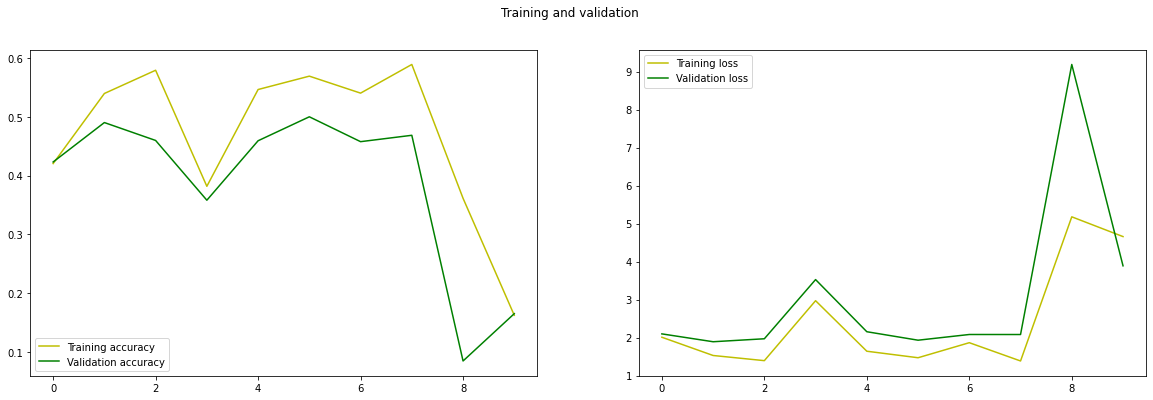

In [19]:
#Plotting training and validation plots

acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [20]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [21]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [22]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [23]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [24]:
#Prediction
quotes = [   
    "It is not a lack of  love, but a  lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN)is a type of artificial neural network which uses sequential data or time series data.",
    "Machine learning is the science of getting computers to act without being explicitly programmed.",
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "The goal of AI is to  make a  compter like humans to solve complex problems.",
    "Statistics are defined as numerical data, and is the field of math that deals with the collection, tabulation and interpretation of numerical data."
    ]


for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of  love, but a  lack o
['ne ', 'f ', 'ur ', ' s ', 're ']

recurrent neural network (rnn)is a type 
['aou ', 'bher ', 'ho ', 'wh ', 'ther ']

machine learning is the science of getti
[' s ', 'e ', 't ', 'an ', 'd ']

deep learning is subset of machine learn
[' athare ', 'e ', 'x ', ', ', 'z ']

the goal of ai is to  make a  compter li
['s ', ' th ', 'n ', 't ', 'r ']

statistics are defined as numerical data
['an ', 't ', 'e ', 'r ', 'n ']

